In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from func4 import *

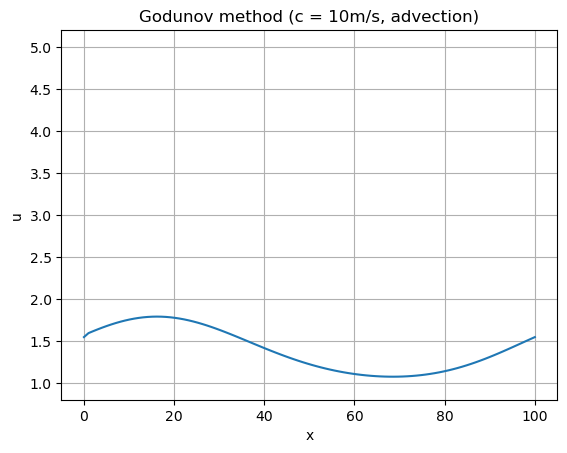

In [2]:
fig, ax = plt.subplots()

c = 10 #m/s
N = 100 # number of plot points
x = np.linspace(0,100,N)
dx = x[1]-x[0]
dt = 0.5*dx/c

vals = np.ones(N)
vals[0] = 1
vals[10:20] = 5

u, = ax.plot(x, vals)

def animate(i):
    for i in range(N-1):
        uL = vals[i]
        uR = vals[i+1]
        vals[i+1] = (uL*c*dt+uR*(dx-c*dt))/dx
        
    vals[0] = vals[N-1] 
    
    u.set_ydata(vals)  # update the data.
    return u,

ani = animation.FuncAnimation(fig, animate, interval=20, blit=True, save_count=200)

plt.title(f'Godunov method (c = {c}m/s, advection)')
plt.ylabel('u')
plt.xlabel('x')
plt.grid()

writergif = animation.PillowWriter(fps=30)
ani.save('advection4.gif', writer = writergif)

# Burgers equation plot

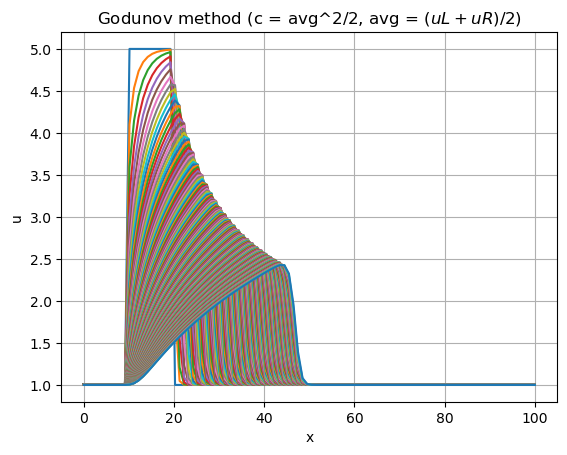

In [3]:
c = 10 # m/s
N = 100 # number of plot points
x = np.linspace(0,100,N)
dx = x[1]-x[0]
dt = 0.5*dx/c

u = np.ones(N)
u[0] = 1

u[10:20] = 5

plt.plot(x,u)

for j in range(200):
    for i in range(N-1):
        uL = u[i]
        uR = u[i+1]
        avg = (uL + uR)/ 2
        c = avg**2/2
        u[i+1] = (uL*c*dt+uR*(dx-c*dt))/dx
        
    u[0] = u[N-1]    
    plt.plot(x,u)

plt.title(f'Godunov method (c = avg^2/2, avg = $(uL + uR)/2$)')
plt.ylabel('u')
plt.xlabel('x')
plt.grid()
plt.show()

# Godunov Method Animation

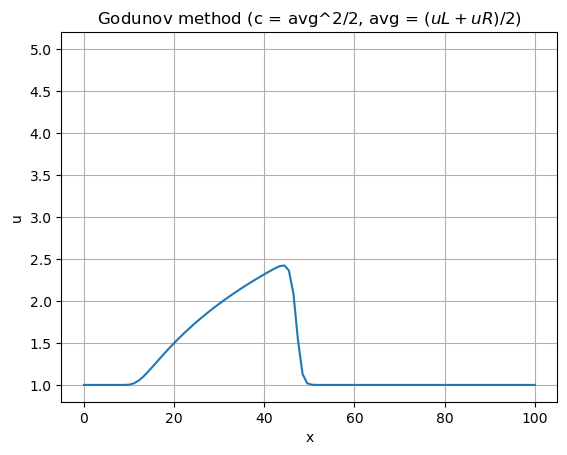

In [5]:
fig, ax = plt.subplots()

c = 10 #m/s
N = 100 # number of plot points
x = np.linspace(0,100,N)
dx = x[1]-x[0]
dt = 0.5*dx/c

vals = np.ones(N)
vals[0] = 1
vals[10:20] = 5

u, = ax.plot(x, vals)

def animate(i):
    for i in range(N-1):
        uL = vals[i]
        uR = vals[i+1]
        avg = (uL + uR)/ 2
        c = avg**2/2
        vals[i+1] = (uL*c*dt+uR*(dx-c*dt))/dx
        
    vals[0] = vals[N-1] 
    
    u.set_ydata(vals)  # update the data.
    return u,

ani = animation.FuncAnimation(fig, animate, interval=20, blit=True, save_count=200)

plt.title(f'Godunov method (c = avg^2/2, avg = $(uL + uR)/2$)')
plt.ylabel('u')
plt.xlabel('x')
plt.grid()

writergif = animation.PillowWriter(fps=30)
ani.save('godunov_method4.gif',writer=writergif)